# **Lasso Regresyon**

**Amaç: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. Lasso regresyon için L1 yöntemi denir. Lasso ve Ridge yöntemlerine düzenleyici yöntemler denir.**


*   Ridge regresonun ilgili ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.

*   Lasso da katsayıları sıfıra yaklaştırır

*   Fakat L1 formu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi gerçekleştirmiş olur.

*   Lamda'nın doğru seçilmesi önemlidir bunun için de CV yöntemi uygulanır.

*   Ridge ve Lasso yöntemleri birbirinden üstün değildir.





---


*   Lambda'ın sıfır olduğu noktada EKK'dır (klasik regresyon modeli). HKT'yi minimum yapan lambdayı arıyoruz.

*   Lambda için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
*   En küçük cross validation'u veren lambda ayar parametresi olarak seçilir.


*   Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.



# **Gerekli Kütüphaneler**

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

# **Veri Seti**

In [32]:
df = pd.read_csv('/content/Hitters.csv')


In [33]:
df=df.dropna() #İçerisindeki boş değerleri kaldırdık

In [34]:
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #Kategorik değişkenleri dummie değişkene çevirdik. (One-hot encoding)

In [35]:
y = df['Salary']
x_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #Kategorik ve bağımlı değişkenleri atıyoruz ve bağımsız değişkenleri elde ediyoruz
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) #Oluşturduğumuz dummieler ile bağımsız değişkenlerimizi bir araya getiriyoruz.


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [37]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [38]:
df.shape

(263, 20)

# ***Bu kısımda veri manipülasyonui, keşifçi veri analizi yapılması gerekmektedir.***

# **Lasso Fonksiyonu**

In [39]:
Lasso_Model= Lasso().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [40]:
Lasso_Model #Lambda değeri yani alpha değeri vermediğimiz için kendisi otomatik alphayı 1 olarak alır.

Lasso()

In [41]:
Lasso_Model.intercept_ #sabit

-5.587450677336506

In [42]:
Lasso_Model.coef_ #katsayılar

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

**Farklı lambda değerlerine karşılık katsayılarımızı gözlemleyelim**

In [43]:
Lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    Lasso.set_params(alpha=a)
    Lasso.fit(x_train,y_train)
    coefs.append(Lasso.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 3.899e

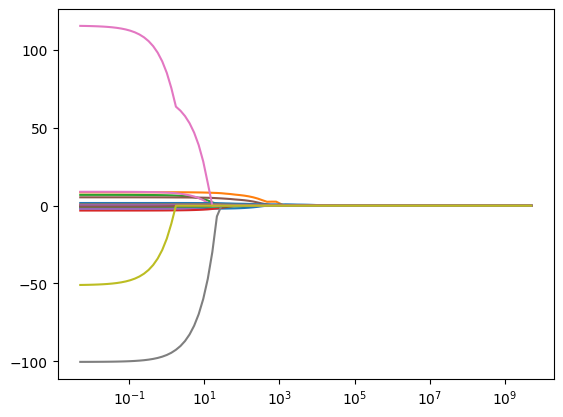

In [44]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')

Ridge'de değerler sıfıra yaklaşıyor fakat sıfır olmuyordu. Lasso'da ise değerlerin sıfır olduğunu grafikte gözlemleyebiliyoruz


# **Tahmin**

In [45]:
Lasso_Model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [46]:
Lasso_Model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

***Test Hatası***

In [47]:
y_pred = Lasso_Model.predict(x_test)

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [49]:
r2_score(y_test,y_pred) #Modelin açıklanabilirliğini ifade etmektedir.

0.41422798132366156

# **Model Tuning**

Optimum lambdayı bulabilmek için lassocv algoritmalarını gerçekleştireceğiz.


In [50]:
lasso_cv_model= LassoCV(cv=10,max_iter=100000).fit(x_train,y_train)

In [51]:
lasso_cv_model.alpha_

563.4670501833854

In [55]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)

In [56]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(x_train,y_train)

In [57]:
y_pred = lasso_tuned.predict(x_test)

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069795

In [60]:
pd.Series(lasso_tuned.coef_,index=x.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

Burada 0 olan katsayılar, anlamsız olan değişkenler olmaktadır. Bu değişkenlerin maaşa olan etkileri 0 dır.